# Exploration of Issue Data from React Repository

In [1]:
import operator
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from classifier import *
from issues import *

## Issue Data Summary

In [2]:
with open('data/react/react_issues_closed.json') as f:
    closed_issues = json.load(f)
print(str(len(closed_issues)) + ' closed issues')
with open('data/react/react_issues_open.json') as f:
    open_issues = json.load(f)
print(str(len(open_issues)) + ' open issues')

5575 closed issues
379 open issues


In [3]:
get_issue_by_title(closed_issues, "Extract react prop from ref")

[{'url': 'https://api.github.com/repos/facebook/react/issues/12903',
  'repository_url': 'https://api.github.com/repos/facebook/react',
  'labels_url': 'https://api.github.com/repos/facebook/react/issues/12903/labels{/name}',
  'comments_url': 'https://api.github.com/repos/facebook/react/issues/12903/comments',
  'events_url': 'https://api.github.com/repos/facebook/react/issues/12903/events',
  'html_url': 'https://github.com/facebook/react/issues/12903',
  'id': 326290102,
  'number': 12903,
  'title': 'Extract react prop from ref',
  'user': {'login': 'gk159yo',
   'id': 18729755,
   'avatar_url': 'https://avatars3.githubusercontent.com/u/18729755?v=4',
   'gravatar_id': '',
   'url': 'https://api.github.com/users/gk159yo',
   'html_url': 'https://github.com/gk159yo',
   'followers_url': 'https://api.github.com/users/gk159yo/followers',
   'following_url': 'https://api.github.com/users/gk159yo/following{/other_user}',
   'gists_url': 'https://api.github.com/users/gk159yo/gists{/gist_

### Issues that are classified as trivial or documentation changes are labeled 'True', all other issues are labeled as 'False'.

{'refactor': 4, 'readme': 90, 'doc': 481, 'easy': 0, 'typo': 12, 'deprecated': 15}
{'refactor': 4, 'readme': 92, 'doc': 492, 'easy': 0, 'typo': 12, 'deprecated': 16}


Text(0.5,1,'open issue labels')

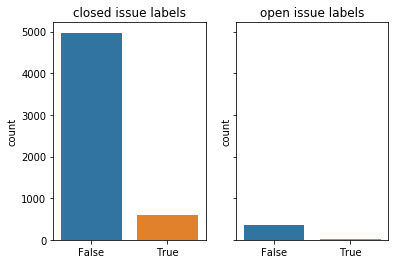

In [4]:
closed_labels = classify_issues(closed_issues)
open_labels = classify_issues(open_issues)

ig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.countplot(closed_labels, ax=ax1).set_title("closed issue labels")
sns.countplot(open_labels, ax=ax2).set_title("open issue labels")

In [5]:
pos_issues_closed = [issue for (i,issue) in enumerate(closed_issues) if closed_labels[i]]
neg_issues_closed = [issue for (i,issue) in enumerate(closed_issues) if not closed_labels[i]]
pos_issues_open = [issue for (i,issue) in enumerate(open_issues) if open_labels[i]]
neg_issues_open = [issue for (i,issue) in enumerate(open_issues) if not open_labels[i]]

## Exploration of Positive Labeled Issues

In [6]:
# Print a sample of positive label titles
print("positive label titles: ")
for issue in pos_issues_closed[:20]:
    print ("\t" + "\"" + issue['title'] + "\"")

positive label titles: 
	"fix docs rake "update_version" command to strip trailing spaces"
	"docs don't even mention reconciliation!"
	"jsx page gives 404 - linked from "why react" blog post"
	"stop requiring docblock for jsx transformer"
	"document forms changes / best practices"
	"better event docs"
	"few issues in the (upcoming) doc"
	"docblock parsing fails with \r\n"
	"link to cdnjs in docs"
	"old jsfiddle links in docs"
	"generate docs using jsdoc (or something)."
	"react broken in safari 5.1.1"
	"fails on whole-document rendering"
	"support onmouseover"
	"docco-style documentation"
	"documentation - createclass and rendercomponent too vague, add more links"
	"fix direct uses of document and global"
	"get rid of sanitize dependency in docs"
	"add a link in each warning to doc pages "
	"document selection and composition events on reference page"


### The classifier misclassifies some examples as documentation/trivial issues that are more complex upon manual inspection. Example below is an issue that was flagged despite being a significant code change with a lot of discussion around it.

In [7]:
misclass_issue = get_issue_by_title(pos_issues_closed, "null props considered differently in getdefaultprops vs. isrequired")
print('title: ' + misclass_issue[0]['title'])
print('')
print('body: ' + misclass_issue[0]['body'])

title: null props considered differently in getdefaultprops vs. isrequired

body: in the case a `null` argument is passed to a property marked as `isrequired`:http://jsfiddle.net/jeanlauliac/0n6snb6b/1/we'll get a proper warning in the console: `warning: required prop `name` was not specified in `hello`.` (though it should probably be "prop was null" and not "prop was not specified", but anyway)on the other hand, the default value is only used when the prop is `undefined`, but not when it's `null`. is this the explicitly wanted behavior? if it is, then we should probably make the documentation explicit about it (http://facebook.github.io/react/docs/reusable-components.html), giving the entire responsibility to component callers of safeguarding against `null`.


## Exploration of Negative Labeled Issues

In [8]:
print("negative label titles: ")
for issue in neg_issues_closed[:20]:
    print ("\t" + "\"" + issue['title'] + "\"")

negative label titles: 
	"can't require() react-tools module"
	"write tests for react-tools module"
	"must adding comments for jsx?"
	"small update to bower command"
	"make valid npm release"
	"react in requirejs ?"
	"is es5-sham required for ie8?"
	"uncaught syntaxerror: unexpected token < "
	"work with compile-to-js languages (like coffeescript)"
	"the name "jsx" is already taken, use "xjs" instead?"
	"jsx not able to watch subdirs"
	"jsx whitespace coalescing should work like regular html"
	"automatically bind scope of all user provided methods."
	"jsx offline transform exits with error code 1 on any change (ubuntu 12.10)"
	"allow namespacing in component names in jsx"
	"ordering of componentdidmount events"
	"preserve line numbers in "grunt test""
	"grunt test just hangs"
	"bin/jsx should not relativize required module ids unless --relativize is passed"
	"support comments in jsx"


### The classifier misses some examples that upon further inspection are clearly simple changes. Example below is an issue that was resolved by simply changing a single URL in a markdown file.

In [9]:
misclass_issue = get_issue_by_title(neg_issues_closed, 'small update to bower command')
print('title: ' + misclass_issue[0]['title'])
print('')
print('body: ' + misclass_issue[0]['body'])

title: small update to bower command

body: it could be preferable to use:```bower install --save react```so that the installation is automatically saved in the `bower.json`.


## Comparsion of Issue Classes

In [10]:
neg_issues_freqs = sorted(get_word_freq_title(neg_issues_closed).items(), key=lambda x: x[1], reverse=True)
pos_issues_freqs = sorted(get_word_freq_title(pos_issues_closed).items(), key=lambda x: x[1], reverse=True)

# print top 20 words for negative issues
print("Top words in Negative Issue Titles: ")
for (word, freq) in neg_issues_freqs[:30]:
    print("\t" + word + ": " + str(freq))
print("")
# print top 20 words for positive issues
print("Top words in Positive Issue Titles: ")
for (word, freq) in pos_issues_freqs[:30]:
    print("\t" + word + ": " + str(freq))

Top words in Negative Issue Titles: 
	react: 0.024803607797497816
	component: 0.012365434972359616
	error: 0.010619726505673553
	render: 0.007273785277858598
	event: 0.006473668897294152
	using: 0.006400931044515566
	dom: 0.006400931044515566
	jsx: 0.00632819319173698
	components: 0.00632819319173698
	input: 0.005891766075065464
	element: 0.005455338958393948
	doesnt: 0.005382601105615362
	property: 0.005128018620890311
	rendering: 0.004946173988943846
	add: 0.004909805062554553
	support: 0.004546115798661624
	attribute: 0.004546115798661624
	value: 0.004473377945883037
	props: 0.004291533313936572
	state: 0.0042551643875472795
	work: 0.0041460576083794005
	function: 0.004109688681990108
	setstate: 0.004036950829211522
	update: 0.00389147512365435
	null: 0.003855106197265057
	undefined: 0.0038187372708757637
	cannot: 0.003636892638929299
	html: 0.00352778585976142
	children: 0.003455048006982834

Top words in Positive Issue Titles: 
	docs: 0.041263700838168924
	documentation: 0.0245003

In [11]:
#TODO: list words with biggest differences between the two classes

In [12]:
neg_issues_freqs = sorted(get_word_freq_body(neg_issues_closed).items(), key=lambda x: x[1], reverse=True)
pos_issues_freqs = sorted(get_word_freq_body(pos_issues_closed).items(), key=lambda x: x[1], reverse=True)

# print top 20 words for negative issues
print("Top words in Negative Issue Bodies: ")
for (word, freq) in neg_issues_freqs[:30]:
    print("\t" + word + ": " + str(freq))
print("")
# print top 20 words for positive issues
print("Top words in Positive Issue Bodies: ")
for (word, freq) in pos_issues_freqs[:30]:
    print("\t" + word + ": " + str(freq))

Top words in Negative Issue Bodies: 
	react: 0.01410491860624914
	component: 0.007739589970390915
	render: 0.006612071011831141
	return: 0.006530864660245118
	div: 0.006349712029783991
	function: 0.005643841435228564
	like: 0.005387729095611109
	using: 0.004709968391989306
	error: 0.004622515397973589
	code: 0.003666779106230401
	module: 0.0035449695788513673
	behavior: 0.0034106667666129456
	get: 0.003176417675499419
	one: 0.0031201978936321725
	other: 0.0030702247541946203
	bug: 0.00300775832989768
	problem: 0.0029046887298077285
	im: 0.0028984420873780343
	components: 0.00286096223279987
	value: 0.002848468947940482
	only: 0.002842222305510788
	all: 0.002814112414577165
	just: 0.0028109890933623177
	request: 0.0027766325599990005
	var: 0.002723536099346601
	case: 0.002686056244768437
	any: 0.002657946353834814
	input: 0.0026516997114051197
	element: 0.0026048498931824145
	new: 0.0025986032507527203

Top words in Positive Issue Bodies: 
	react: 0.01532848564696344
	x: 0.0098811725658

In [13]:
#TODO: list words with biggest differences between the two classes
neg_freqs = get_word_freq_body(neg_issues_closed)
pos_freqs = get_word_freq_body(pos_issues_closed)
freq_diffs = {}
for word in neg_freqs:
    freq_diffs[word] = neg_freqs[word] - pos_freqs.get(word, 0)
for word in pos_freqs:
    if word not in neg_freqs:
        freq_diffs[word] = - pos_freqs[word]
freq_diffs = sorted(freq_diffs.items(), key=lambda x: x[1], reverse=True)
# print top 20 words for negative issues
print("Top words in Negative Issue Bodies compared to Positive Issues: ")
for (word, freq) in freq_diffs[:20]:
    print("\t" + word + ": " + str(freq))
print("")
# print top 20 words for positive issues
print("Top words in Positive Issue Bodies compared to Negative Issues: ")
for (word, freq) in freq_diffs[:-20:-1]:
    print("\t" + word + ": " + str(freq))

Top words in Negative Issue Bodies compared to Positive Issues: 
	div: 0.00404410509776139
	module: 0.0032916061797280045
	return: 0.0032878131514660763
	render: 0.002583592965769675
	equal: 0.0020134928729956475
	0: 0.0014592167161390965
	function: 0.0014380090097807444
	expected: 0.0014151158384104843
	var: 0.0013807100839927791
	error: 0.0013287912093698745
	other: 0.0012460082805064092
	unexpected: 0.0012135728718012501
	multiple: 0.0011736446258681654
	behavior: 0.001155732514415018
	1: 0.0010878666512386674
	modules: 0.0010816938403905552
	one: 0.0010679543607329351
	element: 0.0010593331585299025
	case: 0.0010391941504665797
	name: 0.001019128973984839

Top words in Positive Issue Bodies compared to Negative Issues: 
	x: -0.00799780987325839
	documentation: -0.005396640401327624
	docs: -0.004134720188420653
	release: -0.001842655851838121
	update: -0.0016588035019372888
	about: -0.001542915457321583
	repo: -0.0014796018294743586
	link: -0.0013564424423754722
	react: -0.001223567

In [14]:
#TODO: list words with biggest differences between the two classes
neg_freqs = get_word_freq_title(neg_issues_closed)
pos_freqs = get_word_freq_title(pos_issues_closed)
freq_diffs = {}
for word in neg_freqs:
    freq_diffs[word] = neg_freqs[word] - pos_freqs.get(word, 0)
for word in pos_freqs:
    if word not in neg_freqs:
        freq_diffs[word] = - pos_freqs[word]
freq_diffs = sorted(freq_diffs.items(), key=lambda x: x[1], reverse=True)
# print top 20 words for negative issues
print("Top words in Negative Issue Titles compared to Positive Issues: ")
for (word, freq) in freq_diffs[:20]:
    print("\t" + word + ": " + str(freq))
print("")
# print top 20 words for positive issues
print("Top words in Positive Issue Titles compared to Negative Issues: ")
for (word, freq) in freq_diffs[:-20:-1]:
    print("\t" + word + ": " + str(freq))

Top words in Negative Issue Titles compared to Positive Issues: 
	error: 0.006106509226498827
	dom: 0.004144322404928203
	attribute: 0.0035789978102670397
	element: 0.003198730318806585
	component: 0.002694255088413774
	work: 0.002534194294388427
	attributes: 0.002446613417493515
	svg: 0.002342454313031078
	value: 0.0022167693062956745
	render: 0.0021158226730874823
	event: 0.0019604516181194265
	react: 0.001915148738825992
	elements: 0.0019109748710650042
	property: 0.0019042919929083643
	using: 0.0018877137653408402
	inside: 0.0018548152458539423
	object: 0.0018431846929918606
	child: 0.0018382370182864183
	errors: 0.0018184463194646494

Top words in Positive Issue Titles compared to Negative Issues: 
	docs: -0.04111822513261175
	documentation: -0.024463953446273504
	document: -0.022207344806686142
	link: -0.009993552546744036
	doc: -0.006769825918762089
	links: -0.005802707930367505
	update: -0.005779704760291492
	deprecated: -0.005121593678381823
	page: -0.003952840359219004
	react

In [15]:
print("Positive issue data summary ")
pos_df = pd.DataFrame({'body length': [len(issue['body']) for issue in pos_issues_closed],
                      'comments': [issue['comments'] for issue in pos_issues_closed],
                      'lines of code': [get_num_code_lines(issue) for issue in pos_issues_closed]})
pos_df.describe()

Positive issue data summary 


,body length,comments,lines of code
count,602.000000,602.000000,602.000000
mean,873.073090,5.991694,142.509967
std,1266.261993,13.279346,598.767915
min,11.000000,0.000000,0.000000
25%,313.000000,2.000000,0.000000
50%,534.500000,3.000000,0.000000
75%,982.500000,6.000000,0.000000
max,14900.000000,254.000000,7643.000000


In [16]:
print("Negative issue datary summary: ")
neg_df = pd.DataFrame({'body length': [len(issue['body']) for issue in neg_issues_closed],
                      'comments': [issue['comments'] for issue in neg_issues_closed],
                      'lines of code': [get_num_code_lines(issue) for issue in neg_issues_closed]})
neg_df.describe()

Negative issue datary summary: 


,body length,comments,lines of code
count,4973.000000,4973.000000,4973.000000
mean,854.844963,5.406596,244.819023
std,1689.656103,8.913681,1501.523008
min,0.000000,0.000000,0.000000
25%,298.000000,2.000000,0.000000
50%,573.000000,3.000000,0.000000
75%,1019.000000,6.000000,202.000000
max,91176.000000,259.000000,91090.000000


In [17]:
#TODO: Manually look at recent issues in React to determine normal use case.

In [18]:
#TODO: other statistics that may be meaningful?????